#Q.1 Delivery_time -> Predict delivery time using sorting time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [3]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [6]:
## Import the dataset
data = pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-10-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

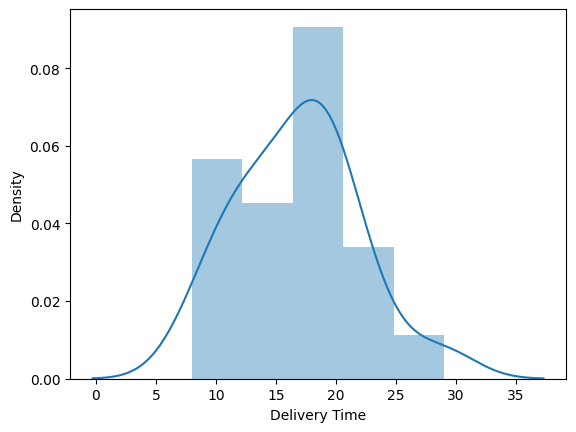

In [10]:
sns.distplot(data['Delivery Time'])

<ipython-input-11-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

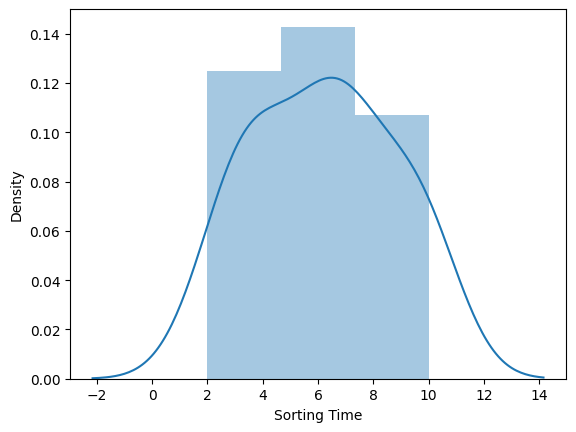

In [11]:
sns.distplot(data['Sorting Time'])

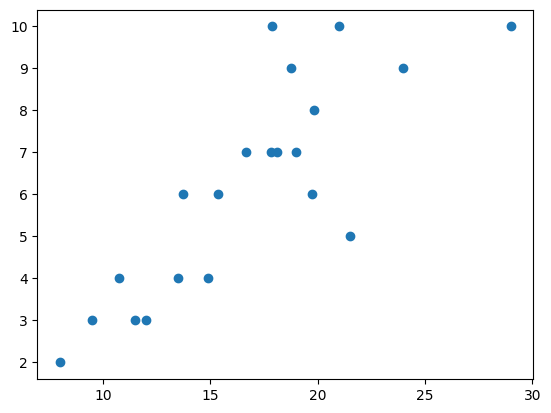

In [12]:
plt.scatter(data['Delivery Time'],data['Sorting Time'])

In [13]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'}, axis=1)

In [14]:
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

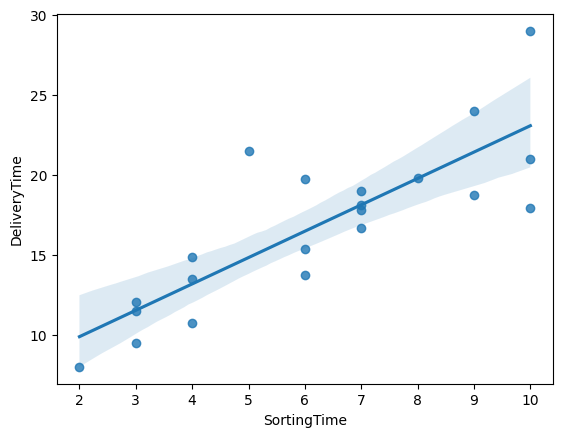

In [15]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data)

In [16]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

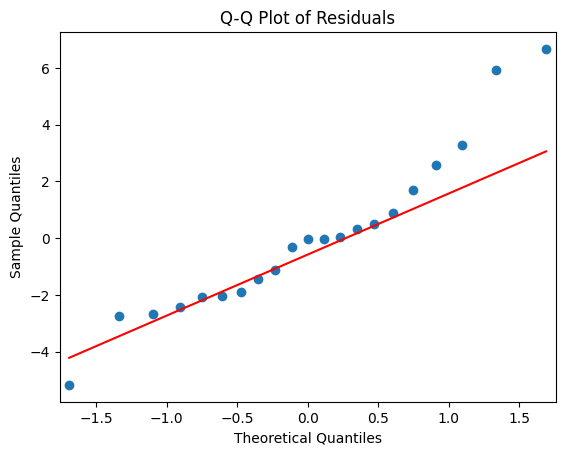

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [20]:
#Sqrt Transformations
data1=pd.merge(np.sqrt(data['SortingTime']).reset_index(),data['DeliveryTime'].reset_index())
data1.drop('index', axis=1)

,SortingTime,DeliveryTime
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [56]:
#Square
import warnings
warnings.filterwarnings("ignore")
data2=np.square((data['SortingTime']),(data['DeliveryTime']))
data2

0     100.0
1      16.0
2      36.0
3      81.0
4     100.0
5      36.0
6      49.0
7       9.0
8     100.0
9      81.0
10     64.0
11     16.0
12     49.0
13      9.0
14      9.0
15     16.0
16     36.0
17     49.0
18      4.0
19     49.0
20     25.0
Name: SortingTime, dtype: float64

In [58]:
#log
data3=np.log((data['SortingTime']),(data['DeliveryTime']))
data3

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: SortingTime, dtype: float64

In [67]:
#mse
def mean_squared_error(delivery_time,sorting_time):
  n=len(delivery_time)
  sq_diff=[(delivery_time[i]-sorting_time[i])**2 for i in range(n)]
  mse = sum(sq_diff)/n
  return mse

In [69]:
mse_result = mean_squared_error((data['SortingTime']),(data['DeliveryTime']))
print("Mean Squared Error:", mse_result)

Mean Squared Error: 24.05744013526808


In [71]:
#rmse value
rmse = np. sqrt(mse_result)
rmse

4.904838441301414

In [21]:
model1=smf.ols('DeliveryTime~SortingTime', data=data1).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

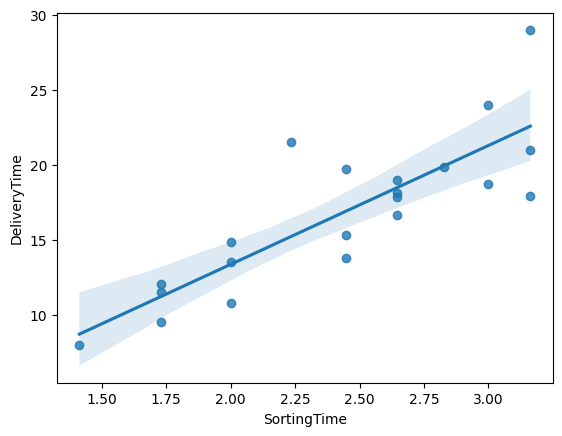

In [22]:
sns.regplot(x='SortingTime',y='DeliveryTime', data=data1)

In [23]:
model1.params

Intercept     -2.518837
SortingTime    7.936591
dtype: float64

In [24]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept     -0.840911
SortingTime    6.592434
dtype: float64 
 Intercept      0.410857
SortingTime    0.000003
dtype: float64


In [25]:
(model1.rsquared,model1.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

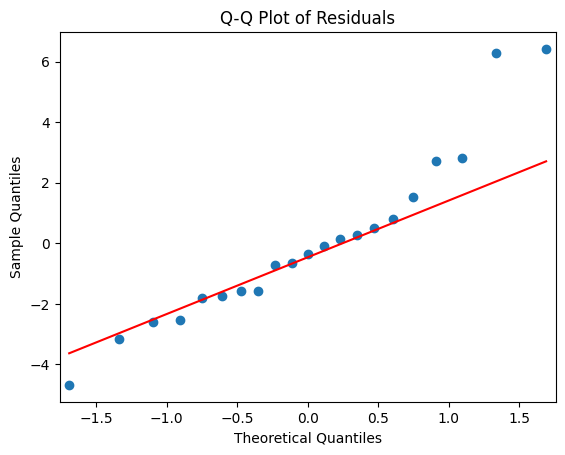

In [26]:
qqplot1=sm.qqplot(model1.resid,line='q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [27]:
#Data Prediction
y=model1.predict(data1['SortingTime'])
y

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [28]:
data2=pd.merge(data.reset_index(),y.reset_index())
data2=data2.drop('index',axis=1)
data2.columns=['DeliveryTime','SortingTime','Predicted DeliveryTime']
print(data2)

    DeliveryTime  SortingTime  Predicted DeliveryTime
0          21.00           10               22.578867
1          13.50            4               13.354345
2          19.75            6               16.921761
3          24.00            9               21.290936
4          29.00           10               22.578867
5          15.35            6               16.921761
6          19.00            7               18.479409
7           9.50            3               11.227742
8          17.90           10               22.578867
9          18.75            9               21.290936
10         19.83            8               19.929232
11         10.75            4               13.354345
12         16.68            7               18.479409
13         11.50            3               11.227742
14         12.03            3               11.227742
15         14.88            4               13.354345
16         13.75            6               16.921761
17         18.11            

In [29]:
newdata=pd.Series([4,6,8,10])
data3=pd.DataFrame(newdata,columns=['SortingTime'])
data3

,SortingTime
0,4
1,6
2,8
3,10


In [30]:
model.predict(data3)

0    13.178814
1    16.476853
2    19.774893
3    23.072933
dtype: float64

In [31]:
model1.predict(data3)

0    29.227526
1    45.100708
2    60.973889
3    76.847071
dtype: float64

# Q.2 Salary_hike -> Build a prediction model for Salary_hike

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np

In [34]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data (1).csv to Salary_Data (1).csv


In [35]:
df=pd.read_csv("Salary_Data (1).csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<ipython-input-37-6737e57d990c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

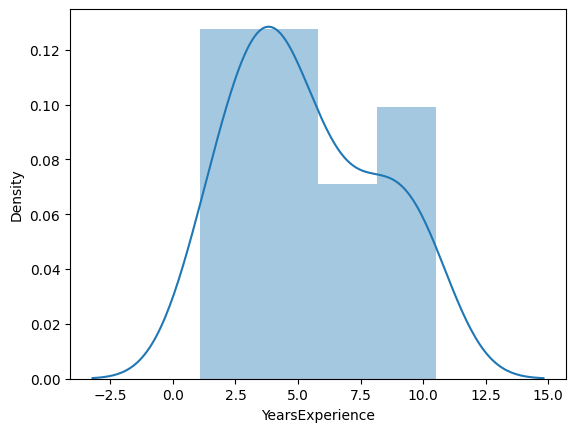

In [37]:
sns.distplot(df['YearsExperience'])

<ipython-input-38-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

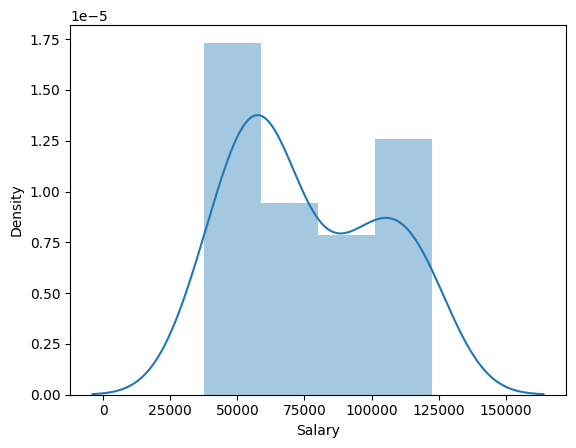

In [38]:
sns.distplot(df['Salary'])

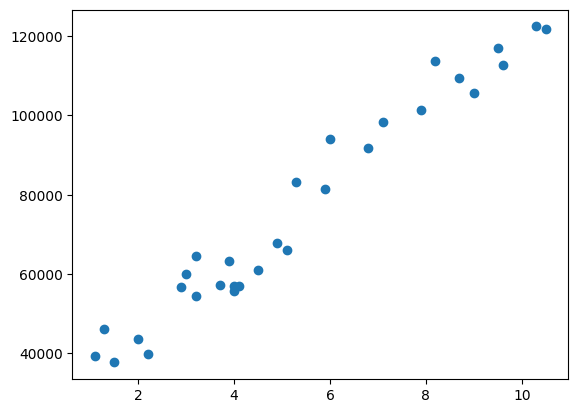

In [39]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [40]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [41]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience', data=df).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

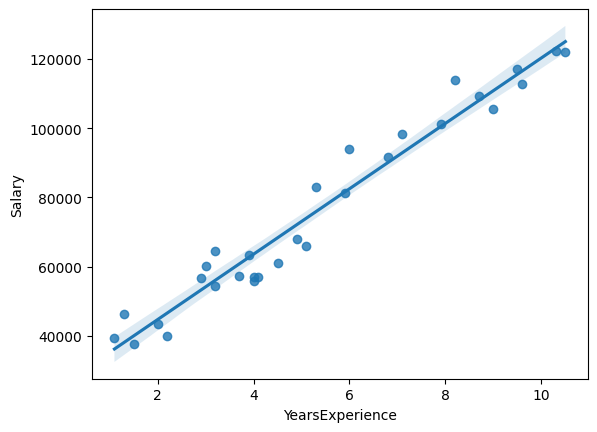

In [42]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [43]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [44]:
print(model.tvalues,'\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [45]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

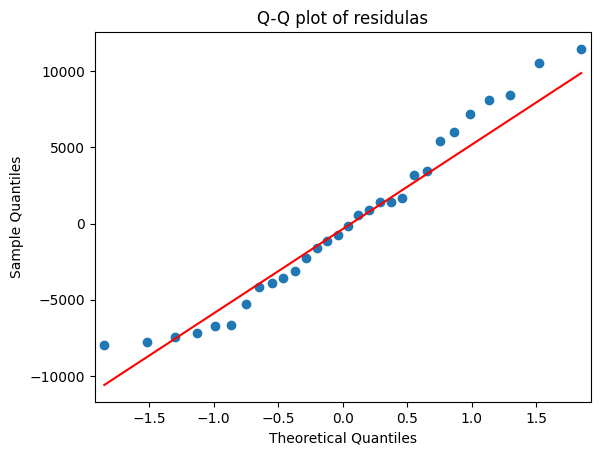

In [46]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title('Q-Q plot of residulas')
plt.show()

In [47]:
#Predict Salary
y1=model.predict(df['YearsExperience'])
df2=pd.merge(df.reset_index(),y1.reset_index())
df2=df2.drop('index', axis=1)
df2.columns=['YearsExp','Salary','Predicted Salary']
df2

,YearsExp,Salary,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [48]:
newdata1=pd.Series([2.1,3.5,5.7,7.3,10.6])
df3=pd.DataFrame(newdata1, columns=['YearsExperience'])
df3

,YearsExperience
0,2.1
1,3.5
2,5.7
3,7.3
4,10.6


In [49]:
y2=model.predict(df3)
print(y2)

0     45637.121074
1     58867.068324
2     79656.985431
3     94776.925145
4    125961.800806
dtype: float64
